DIT374: Assignment 8
Student: Diana Salim

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Used to do datetime math
def __datetime(date_str):
    return datetime.strptime(date_str, '%b %d, %Y %H:%M:%S')

# Class containing poll questions, correct answer and when they were launched
class Poll:
    class Question:
        def __init__(self, data):
            # 0 = question, 1 = answer, 2 = time launched
            self.question = data[0]
            self.correct = data[1]
            self.launched = data[2]

    def __init__(self):
        values = pd.read_csv('Poll_Info.csv', sep='\t').values
        self.questions = [self.Question(data) for data in values]

    # Return question containing question number, correct answer and launch time
    def get_question(self, n):
        return self.questions[n-1]

    # Check if answer is correct for given question
    def check_answer(self, question, answer):
        correct_answer = self.get_question(question).correct
        if correct_answer == answer:
            return True
        return False

    # Get launch time of question
    def get_launched(self, question):
        return self.get_question(question).launched

# Data structure for simplifying answers
class Answer:
    def __init__(self, row):
        self.question = row[0] # Question number
        self.user = row[1] # Username
        self.email = row[2] # Email
        self.submitted = row[3] # Time submitted
        self.answer = row[4] # Question answer
        self.correct = False # If question is correctly answered

# Data structure for each user containing number of correct answers and the answers to each question
class Student:
    def __init__(self, user):
        self.user = user
        self.correct_answers = 0
        self.questions = []

    # Save answer to self.questions
    def add_answer(self, question, response_time, correct):
        #0 = question, 1 = response time
        self.questions.append({'question': question, 'response_time': response_time.seconds, 'correct': correct})

# Data structure for questions
class Question:
    def __init__(self, question):
        self.question = question
        self.correct_answers = 0

# Create plot when given a dictionary as data and other string parameters for the plot
def show_plot(data, title, xlabel, ylabel):
    index = data.keys()
    values = data.values()
    
    s = pd.Series(
        values,
        index = index
    )

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    s.plot(
        kind='bar', 
        color=list('rgbkymc')
    )

    plt.show()

# Show plot of each students' performance
def show_students_performance_plot(data):
    student_performance_data = [student for student in data.values()] # Create list of dictionary
    student_performance_data = sorted(student_performance_data, key=lambda student: student.correct_answers) # Sort list by correct answers
    student_performance_data = {student.user: student.correct_answers for student in student_performance_data} # Back to dictionary for the plot
    show_plot(student_performance_data, 'Individual student performance', 'Student', 'Points')

# Show plot of total number of correct answers per question
def show_question_correct_answers_plot(data):
    question_performance_data = [question for question in data.values()] # Dictionary to list
    question_performance_data = sorted(question_performance_data, key=lambda question: question.correct_answers) # Sort list by correct answers
    question_performance_data = {question.question: question.correct_answers for question in question_performance_data} # Back to dictionary for the plot
    show_plot(question_performance_data, 'Total number of correct answers per question', 'Question', 'Points')

# Show plot of user's response time for questions
def show_user_response_time_plot(user, data):
    sorted_data = sorted(data, key=lambda x: x.get('response_time')) # Sort by response time
    dict_data = {i['question']: i['response_time'] for i in sorted_data} # Convert to dictionary for plot
    show_plot(dict_data, 'Question response time for ' + user, 'Question', 'Response time')

# Show plot of question that took longest
def show_question_longest_responses_plot(data):
    questions = [student.questions for student in data.values()] # Create a list of all the students' answers
    questions = sum(questions, []) # Merge lists into one list
    questions_max = {} # Final output for plot function
    
    for question in questions:
        number = question['question']
        time = question['response_time']

        if number not in questions_max:
            questions_max[number] = question # Set the key in the dictionary
            continue

        if questions_max[number]['response_time'] < time: # If current max response time is lower, update with new one
            questions_max[number] = question

    # Sort values from lowest to highest
    questions_max = [question for question in questions_max.values()] # Create a list so we can sort it
    questions_max = sorted(questions_max, key=lambda question: question['response_time']) # Sort the list by response time
    questions_max = {question['question']: question['response_time'] for question in questions_max} # Turn the list into a dictionary for our graph function
    show_plot(questions_max, 'Longest response times of questions', 'Question', 'Response time')

# Show plot of average response time for each question
def show_questions_average_response_time_plot(data):
    questions = [student.questions for student in data.values()] # Create a list of all the students' answers
    questions = sum(questions, []) # Merge lists into one list
    questions_max = {}
    
    for question in questions:
        number = question['question']
        time = question['response_time']

        if number not in questions_max:
            questions_max[number] = []

        questions_max[number].append(time)

    questions_max = [{'question': key, 'average': sum(value)/len(value)} for key, value in questions_max.items()] # Create a list so we can sort it
    questions_max = sorted(questions_max, key=lambda question: question['average']) # Sort the list by average response time
    questions_max = {question['question']: question['average'] for question in questions_max} # Turn the list into a dictionary for our plot function
    show_plot(questions_max, 'Questions average response time', 'Question', 'Response time')

# Plot data for time spent vs performance correlation
# Students are sorted by time spent and Y-axis reflects points
def show_time_spent_performance_correlation(data):
    plot_data = {}

    for student in data.values():
        points = student.correct_answers
        time_spent = sum([question['response_time'] for question in student.questions]) # Sum the time spent for all questions

        plot_data[student.user] = {'user': student.user, 'time_spent': time_spent, 'points': points}

    plot_data = [{'user': student['user'], 'points': student['points'], 'time_spent': student['time_spent']} for student in plot_data.values()] # Create a list of dictionaries so we can sort it
    plot_data = sorted(plot_data, key=lambda student: student['time_spent']) # Sort the list by time spent
    plot_data = {student['time_spent']: student['points'] for student in plot_data} # Turn the list into a dictionary for our plot function
    show_plot(plot_data, 'Time spent and points correlation', 'Time spent per student (seconds)', 'Points')

# Find pairs of students who had 2 or more common incorrect answers
def find_pairs(data):
    for student in data.values():
        student.questions = [question['question'] for question in student.questions if question['correct'] == False] # Get list of false answers

    pairs = {} # Final output
    students = data.values() # Convert dict values to list

    for i, student in enumerate(students):
        other_students = list(students)
        del other_students[i] # Remove user from the new list 

        for other_student in other_students:
            student_errors = set(student.questions)
            other_student_errors = set(other_student.questions)
            common = student_errors.intersection(other_student_errors) # Check which errors they have in common by comparing sets

            separator = ' & '
            key1 = f'{student.user}{separator}{other_student.user}' # Using keys so we don't get duplicates when matching two same students
            key2 = f'{other_student.user}{separator}{student.user}'

            if len(common) > 1 and key1 not in pairs and key2 not in pairs: # If there's more than one common error and the pair isn't recorded
                pairs[key1] = {'common_errors': common} # Save it

    print(f'{len(pairs)} pairs found')
    return pairs

poll = Poll()
all_answers = pd.read_csv('Poll_Report.csv', sep=';')
students_dict = {}
questions_dict = {}

for answer in all_answers.values:
    a = Answer(answer) # Answer data structure

    if a.user not in students_dict:
        students_dict[a.user] = Student(a.user) # Create key with student
    
    if a.question not in questions_dict:
        questions_dict[a.question] = Question(a.question) # Create key with question

    result = poll.check_answer(a.question, a.answer) # Check if answer is correct

    if result == True:
        students_dict[a.user].correct_answers += 1 # Update number of correct answers student has given
        questions_dict[a.question].correct_answers += 1 # Update number of total correct answers given for a question

    launched = poll.get_launched(a.question) # Get launch time of question
    time_delta = __datetime(a.submitted) - __datetime(launched) # Time delta of question launch and student submission
    students_dict[a.user].add_answer(a.question, time_delta, result) # Save answer data to student data structure
    students_dict[a.user].correct_answers += 1 # Increase number of correct answers of student


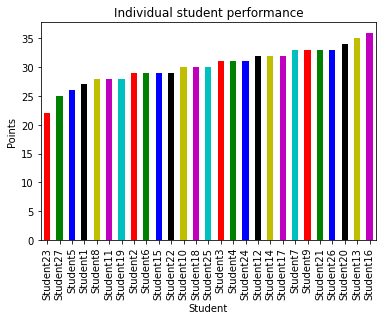

In [3]:
# Q1    
# Show total points per student
# Answer: Student 16 had the highest points
show_students_performance_plot(students_dict)

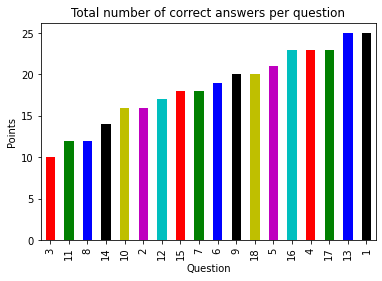

In [4]:
# Q2
# Show total number of correct answers per question
# Answer: Question 13 and 1 had the highest amount of points
show_question_correct_answers_plot(questions_dict)

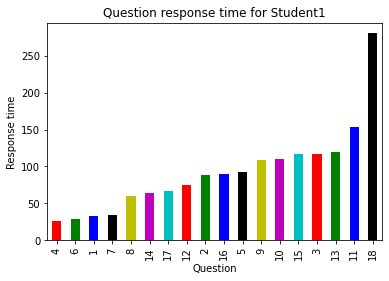

In [5]:
# Q3a
# Show plot of a user's response times for all questions
# Answer: Student1 had the highest response time for question 18
user = 'Student1'
show_user_response_time_plot(user, students_dict[user].questions)

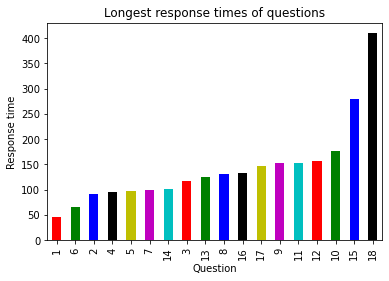

In [6]:
# 3b
# Show plot of longest response times per question
# Answer: Question 18 had the longest response time of all
show_question_longest_responses_plot(students_dict)

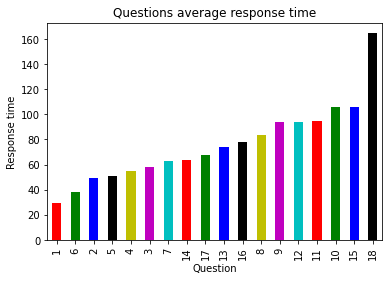

In [7]:
# 3c
# Show plot of average response time per question
# Answer: Question 18 had the longest average response time
show_questions_average_response_time_plot(students_dict)

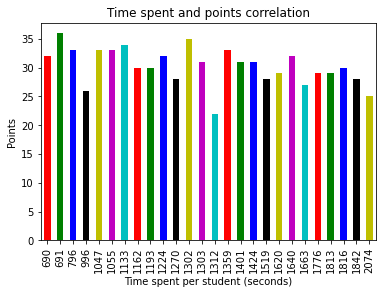

In [8]:
# Q4
# Show plot of time spent on X-axis and points on Y-axis
# There is a slight correlation where longer time spent leads to fewer points
show_time_spent_performance_correlation(students_dict)

In [9]:
# Q5
# Get pairs of all the students who had similar mistakes
# Answer: 209 pairs were found
pairs = find_pairs(students_dict)
print(pairs)
print(f'{len(pairs)} number of pairs found')

209 pairs found
{'Student1 & Student2': {'common_errors': {3, 8, 10, 11, 14}}, 'Student1 & Student3': {'common_errors': {8, 3, 14}}, 'Student1 & Student4': {'common_errors': {2, 3}}, 'Student1 & Student5': {'common_errors': {2, 3, 8, 11, 12, 18}}, 'Student1 & Student6': {'common_errors': {16, 3}}, 'Student1 & Student7': {'common_errors': {3, 12}}, 'Student1 & Student8': {'common_errors': {2, 3, 10, 11, 12, 14, 18}}, 'Student1 & Student9': {'common_errors': {11, 3, 12}}, 'Student1 & Student10': {'common_errors': {8, 2, 10, 14}}, 'Student1 & Student11': {'common_errors': {3, 8, 10, 11, 14}}, 'Student1 & Student12': {'common_errors': {8, 2, 3}}, 'Student1 & Student14': {'common_errors': {8, 3, 14}}, 'Student1 & Student15': {'common_errors': {2, 3, 11, 14, 18}}, 'Student1 & Student17': {'common_errors': {16, 8, 10, 12}}, 'Student1 & Student18': {'common_errors': {8, 10, 11, 14}}, 'Student1 & Student19': {'common_errors': {2, 8, 10, 11, 12, 16}}, 'Student1 & Student22': {'common_errors': {2